# 입원과 재입원 비율 확인

In [1]:
import pandas as pd

In [34]:
data=pd.read_csv("./data/enteral_data_final.csv")

In [3]:
data

,hadm_id,subject_id,admission_type,insurance,admittime,dischtime,gender,anchor_age,icd_code,seq_num,long_title,time_to_next_admission,readmission_within_30_days,infectious_disease,renal_system,circulatory_system,hematologic_lymphatic,respiratory_system,coagulation,immune_system
0,20001361,14577567,5,0,2143-05-04 14:55:00,2143-05-18 16:58:00,1,30,0,3.0,0,0 days 00:00:00,1,0,0,0,0,0,0,0
1,20004357,19657904,5,1,2157-08-05 10:57:00,2157-08-12 18:00:00,0,75,0,4.0,0,0 days 00:00:00,1,0,0,1,0,1,0,0
2,20004775,13158794,5,1,2187-03-07 16:32:00,2187-03-15 15:36:00,0,82,0,1.0,0,0 days 00:00:00,1,0,0,0,0,0,0,0
3,20005119,19244907,5,2,2112-11-08 20:25:00,2112-12-16 17:42:00,0,56,0,12.0,0,235 days 19:17:00,0,0,0,1,0,0,0,0
4,20005479,19669999,5,1,2148-06-01 12:48:00,2148-06-07 18:38:00,0,84,0,3.0,0,0 days 00:00:00,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14084,29997422,15060292,1,2,2155-03-04 15:56:00,2155-03-18 14:23:00,1,32,0,5.0,0,0 days 00:00:00,1,0,0,0,0,0,0,0
14085,29998115,19989305,5,2,2154-05-06 03:02:00,2154-05-20 15:40:00,1,23,0,5.0,0,0 days 00:00:00,1,0,0,1,0,0,0,0
14086,29998592,15272445,5,0,2168-05-28 21:57:00,2168-06-09 05:30:00,1,30,0,4.0,0,0 days 00:00:00,1,0,0,1,0,0,0,0
14087,29999444,10053207,5,1,2199-12-14 17:54:00,2199-12-22 14:01:00,0,55,0,1.0,0,-991 days +01:17:00,1,0,0,0,0,0,0,0


In [35]:
data.head()

,hadm_id,subject_id,admission_type,insurance,admittime,dischtime,gender,anchor_age,icd_code,seq_num,long_title,time_to_next_admission,readmission_within_30_days,infectious_disease,renal_system,circulatory_system,hematologic_lymphatic,respiratory_system,coagulation,immune_system
0,20001361,14577567,5,0,2143-05-04 14:55:00,2143-05-18 16:58:00,1,30,0,3.0,0,0 days 00:00:00,1,0,0,0,0,0,0,0
1,20004357,19657904,5,1,2157-08-05 10:57:00,2157-08-12 18:00:00,0,75,0,4.0,0,0 days 00:00:00,1,0,0,1,0,1,0,0
2,20004775,13158794,5,1,2187-03-07 16:32:00,2187-03-15 15:36:00,0,82,0,1.0,0,0 days 00:00:00,1,0,0,0,0,0,0,0
3,20005119,19244907,5,2,2112-11-08 20:25:00,2112-12-16 17:42:00,0,56,0,12.0,0,235 days 19:17:00,0,0,0,1,0,0,0,0
4,20005479,19669999,5,1,2148-06-01 12:48:00,2148-06-07 18:38:00,0,84,0,3.0,0,0 days 00:00:00,1,0,0,0,0,0,0,0


In [5]:
# 클래스별 데이터 개수 확인
class_counts = data['readmission_within_30_days'].value_counts()

# 클래스별 비율 계산
class_ratios = data['readmission_within_30_days'].value_counts(normalize=True)

# 결과 출력
print("클래스별 데이터 개수:\n", class_counts)
print("\n클래스별 비율:\n", class_ratios)


클래스별 데이터 개수:
 1    12990
0     1099
Name: readmission_within_30_days, dtype: int64

클래스별 비율:
 1    0.921996
0    0.078004
Name: readmission_within_30_days, dtype: float64


## 모듈 임포트

In [26]:
!pip install hyperopt
!pip install optuna

# 클래스 가중치 사용한 모델에 대한 파라미터 튜닝

## <질병변수>

## <li> XGBoost - Hyperopt 사용

In [5]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
import numpy as np

# 1. 데이터 로드 및 전처리
enteral_infusion_data = pd.read_csv("./data/enteral_data_final.csv")
X = enteral_infusion_data.drop(columns=['subject_id', 'hadm_id', 'admittime', 'dischtime', 'time_to_next_admission', 
                                        'readmission_within_30_days', 'icd_code', 'long_title', 'admission_type', 
                                        'insurance', 'gender', 'anchor_age', 'seq_num'])
y = enteral_infusion_data['readmission_within_30_days']

# 문자열 데이터를 범주형으로 변환
object_cols = X.select_dtypes(include=['object']).columns
for col in object_cols:
    X[col] = X[col].astype('category')

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 클래스 불균형 처리
scale_pos_weight = len(y_train) / sum(y_train)

# 2. Hyperopt 목적 함수 정의
def objective(params):
    model = XGBClassifier(
        max_depth=int(params['max_depth']),
        learning_rate=params['learning_rate'],
        n_estimators=int(params['n_estimators']),
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        scale_pos_weight=scale_pos_weight,
        min_child_weight=params['min_child_weight'],
        gamma=params['gamma'],
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    return {'loss': -f1, 'status': STATUS_OK}

# 3. Hyperparameter Search Space 설정
space = {
    'max_depth': hp.choice('max_depth', range(3, 10)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'n_estimators': hp.choice('n_estimators', range(100, 1000, 100)),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
    'min_child_weight': hp.uniform('min_child_weight', 1, 10),
    'gamma': hp.uniform('gamma', 0, 5)
}

# 4. Hyperopt 실행
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# 5. 최적 파라미터 출력
print(f"Best Parameters: {best}")


100%|███████████████████████████████████████████████| 50/50 [05:38<00:00,  6.77s/trial, best loss: -0.9630810744511223]
Best Parameters: {'colsample_bytree': 0.8417616995080488, 'gamma': 0.9288105186619905, 'learning_rate': 0.1040895410940758, 'max_depth': 6, 'min_child_weight': 1.3419167180055607, 'n_estimators': 7, 'subsample': 0.8628960395087852}


Final F1 Score: 0.9631
Final Accuracy: 0.9288
Final ROC-AUC: 0.6488


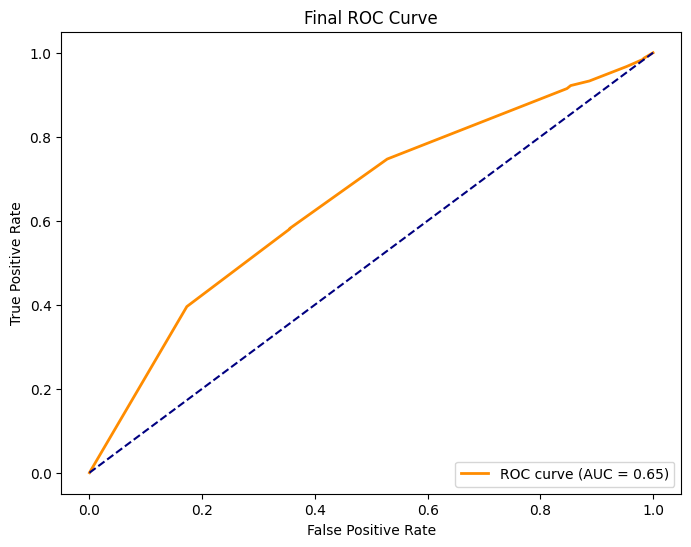

In [36]:
# 최적 파라미터 적용 후 모델 학습
optimal_params = {
    'max_depth': int(best['max_depth']),
    'learning_rate': best['learning_rate'],
    'n_estimators': int(best['n_estimators']),
    'subsample': best['subsample'],
    'colsample_bytree': best['colsample_bytree'],
    'scale_pos_weight': scale_pos_weight,
    'min_child_weight': best['min_child_weight'],
    'gamma': best['gamma'],
    'random_state': 42
}

final_model = XGBClassifier(**optimal_params)
final_model.fit(X_train, y_train)

# 최종 성능 평가
y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)[:, 1]  # ROC-AUC 계산을 위한 확률값

# F1 Score
final_f1 = f1_score(y_test, y_pred)
print(f"Final F1 Score: {final_f1:.4f}")

# 정확도
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Final Accuracy: {final_accuracy:.4f}")

# ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
final_roc_auc = auc(fpr, tpr)
print(f"Final ROC-AUC: {final_roc_auc:.4f}")

# ROC-AUC 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {final_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Final ROC Curve')
plt.legend(loc='lower right')
plt.show()


## <li> Logistic regression

[I 2024-12-11 23:54:03,715] A new study created in memory with name: no-name-bc03a56f-4113-4080-b3b6-82dba725d479
C:\Users\songa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-12-11 23:54:03,849] Trial 0 finished with value: 0.7846196758315019 and parameters: {'C': 0.005648064260347455, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.7846196758315019.
C:\Users\songa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-12-11 23:54:03,969] Trial 1 finished with value: 0.7934032205978389 and par

[I 2024-12-11 23:54:05,845] Trial 16 finished with value: 0.957835780523043 and parameters: {'C': 0.042474002240904994, 'class_weight': None}. Best is trial 2 with value: 0.957835780523043.
C:\Users\songa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-12-11 23:54:05,945] Trial 17 finished with value: 0.957835780523043 and parameters: {'C': 0.000204062579099043, 'class_weight': None}. Best is trial 2 with value: 0.957835780523043.
C:\Users\songa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-12-11 

[I 2024-12-11 23:54:07,762] Trial 33 finished with value: 0.957835780523043 and parameters: {'C': 0.008518624313305478, 'class_weight': None}. Best is trial 2 with value: 0.957835780523043.
C:\Users\songa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-12-11 23:54:07,883] Trial 34 finished with value: 0.7913230689186288 and parameters: {'C': 0.05980231900018014, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.957835780523043.
C:\Users\songa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-

Best Parameters: {'C': 0.011549926704147732, 'class_weight': None}
Best F1 Score: 0.9578
Accuracy: 0.9288
ROC-AUC: 0.6448
F1 Score: 0.9631


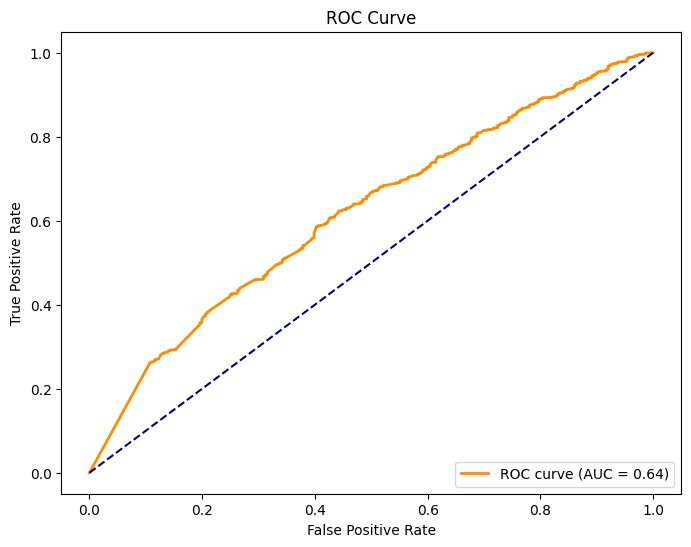

In [41]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# 데이터 로드 및 전처리
enteral_infusion_data = pd.read_csv("./data/enteral_data_final.csv")
X = enteral_infusion_data.drop(columns=['subject_id', 'hadm_id', 'admittime', 'dischtime', 'time_to_next_admission', 'readmission_within_30_days', 'icd_code', 'long_title', 'admission_type', 'insurance', 'gender', 'anchor_age', 'seq_num'])
y = enteral_infusion_data['readmission_within_30_days']

# 문자열 데이터를 범주형으로 변환
object_cols = X.select_dtypes(include=['object']).columns
for col in object_cols:
    X[col] = X[col].astype('category')

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Objective 함수 정의
def objective(trial):
    # 하이퍼파라미터 제안
    C = trial.suggest_loguniform('C', 1e-4, 1e4)  # 규제 강도
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])  # 클래스 가중치

    # 로지스틱 회귀 모델 생성
    logistic_model = LogisticRegression(
        max_iter=1000,
        solver='liblinear',
        C=C,
        class_weight=class_weight
    )

    # 교차 검증 점수 계산 (F1 스코어 사용)
    f1 = cross_val_score(logistic_model, X_train, y_train, cv=3, scoring='f1').mean()

    return f1  # F1 스코어 최대화 목표

# Optuna 스터디 생성 및 최적화 실행
study = optuna.create_study(direction='maximize')  # 최대화 목표
study.optimize(objective, n_trials=50)  # 50번의 반복

# 최적의 하이퍼파라미터 출력
print(f"Best Parameters: {study.best_params}")
print(f"Best F1 Score: {study.best_value:.4f}")

# 최적의 하이퍼파라미터로 최종 모델 학습
best_params = study.best_params
final_model = LogisticRegression(
    max_iter=1000,
    solver='liblinear',
    C=best_params['C'],
    class_weight=best_params['class_weight']
)
final_model.fit(X_train, y_train)

# 테스트 데이터에서 평가
y_pred = final_model.predict(X_test)
y_pred_prob = final_model.predict_proba(X_test)[:, 1]  # 확률값

# 평가 결과 출력
accuracy = accuracy_score(y_test, y_pred)
roc_auc = auc(*roc_curve(y_test, y_pred_prob)[:2])
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")

# ROC-AUC 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## <li> Random Forest

[I 2024-12-11 14:14:36,225] A new study created in memory with name: no-name-07294e96-049c-4445-9fb2-e0b03b321dc4
[I 2024-12-11 14:14:37,960] Trial 0 finished with value: 0.8101039159205046 and parameters: {'n_estimators': 75, 'max_features': 0.5873835027890008, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8101039159205046.
[I 2024-12-11 14:14:39,893] Trial 1 finished with value: 0.957835780523043 and parameters: {'n_estimators': 101, 'max_features': 0.3474429719639588, 'class_weight': None}. Best is trial 1 with value: 0.957835780523043.
[I 2024-12-11 14:14:41,607] Trial 2 finished with value: 0.957835780523043 and parameters: {'n_estimators': 98, 'max_features': 0.6979931067124177, 'class_weight': None}. Best is trial 1 with value: 0.957835780523043.
[I 2024-12-11 14:14:43,560] Trial 3 finished with value: 0.8085577522923142 and parameters: {'n_estimators': 106, 'max_features': 0.9395328016548421, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.95783578052304

[I 2024-12-11 14:15:45,344] Trial 37 finished with value: 0.765169725325782 and parameters: {'n_estimators': 68, 'max_features': 0.44246340257671696, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.957835780523043.
[I 2024-12-11 14:15:47,283] Trial 38 finished with value: 0.957835780523043 and parameters: {'n_estimators': 123, 'max_features': 0.534449529345773, 'class_weight': None}. Best is trial 1 with value: 0.957835780523043.
[I 2024-12-11 14:15:49,124] Trial 39 finished with value: 0.957835780523043 and parameters: {'n_estimators': 101, 'max_features': 0.3546752996928808, 'class_weight': None}. Best is trial 1 with value: 0.957835780523043.
[I 2024-12-11 14:15:51,844] Trial 40 finished with value: 0.7662462123311263 and parameters: {'n_estimators': 163, 'max_features': 0.7690171528442407, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.957835780523043.
[I 2024-12-11 14:15:54,134] Trial 41 finished with value: 0.957835780523043 and parameters: {'n_estimators':

Best Parameters: {'n_estimators': 101, 'max_features': 0.3474429719639588, 'class_weight': None}
Best F1 Score: 0.9578
Accuracy: 0.9288
ROC-AUC: 0.6490
F1 Score: 0.9631


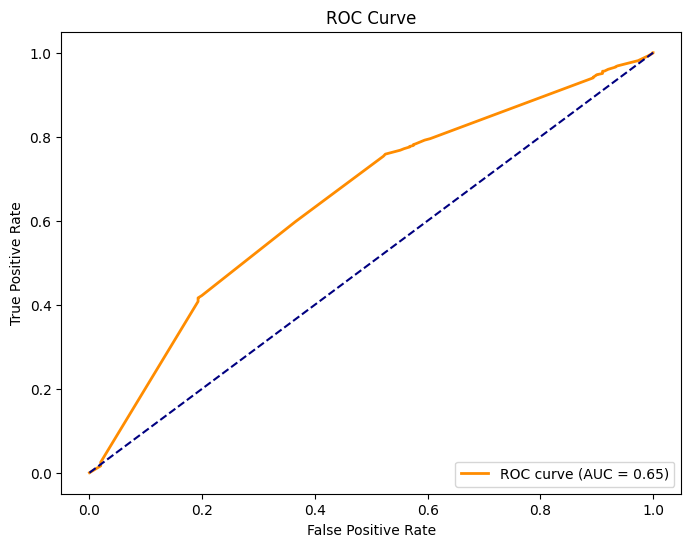

In [29]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score
import matplotlib.pyplot as plt
import optuna

# CSV 파일 읽기
enteral_infusion_data = pd.read_csv("./data/enteral_data_final.csv")

# 레이블 및 독립변수 설정
X = enteral_infusion_data.drop(columns=['subject_id', 'hadm_id', 'admittime', 'dischtime', 'time_to_next_admission', 'readmission_within_30_days', 'icd_code', 'long_title', 'admission_type', 'insurance', 'gender', 'anchor_age', 'seq_num'])
y = enteral_infusion_data['readmission_within_30_days']

# 데이터 타입 확인 및 문자열 데이터 변환
object_cols = X.select_dtypes(include=['object']).columns
if len(object_cols) > 0:
    for col in object_cols:
        X[col] = X[col].astype('category')

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Objective 함수 정의
def objective(trial):
    # 하이퍼파라미터 제안
    n_estimators = trial.suggest_int('n_estimators', 50, 200)  # 트리 수
    max_features = trial.suggest_float('max_features', 0.1, 1.0)  # 각 트리의 최대 특성 비율
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])  # 클래스 가중치

    # 랜덤포레스트 모델 생성
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_features=max_features,
        class_weight=class_weight,
        random_state=42
    )

    # 교차 검증 점수 계산 (F1 스코어 사용)
    f1 = cross_val_score(rf, X_train, y_train, cv=3, scoring='f1').mean()

    return f1  # F1 스코어 최대화 목표

# Optuna 스터디 생성 및 최적화 실행
study = optuna.create_study(direction='maximize')  # 최대화 목표
study.optimize(objective, n_trials=50)  # 50번의 반복

# 최적의 하이퍼파라미터 출력
best_params = study.best_params
best_f1_score = study.best_value

print(f"Best Parameters: {best_params}")
print(f"Best F1 Score: {best_f1_score:.4f}")

# 최적의 하이퍼파라미터로 최종 모델 학습
final_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_features=best_params['max_features'],
    class_weight=best_params['class_weight'],
    random_state=42
)
final_model.fit(X_train, y_train)

# 테스트 데이터에서 평가
y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)[:, 1]  # 확률값

# 정확도
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"ROC-AUC: {roc_auc:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# ROC-AUC 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## <질병변수+기본변수 사용>

## <li> XGBoost

In [17]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
import numpy as np

# 1. 데이터 로드 및 전처리
enteral_infusion_data = pd.read_csv("./data/enteral_data_final.csv")
X = enteral_infusion_data.drop(columns=['subject_id', 'hadm_id', 'admittime', 'dischtime', 'time_to_next_admission', 'readmission_within_30_days', 'icd_code', 'long_title'])
y = enteral_infusion_data['readmission_within_30_days']

# 문자열 데이터를 범주형으로 변환
object_cols = X.select_dtypes(include=['object']).columns
for col in object_cols:
    X[col] = X[col].astype('category')

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 클래스 불균형 처리
scale_pos_weight = len(y_train) / sum(y_train)

# 2. Hyperopt 목적 함수 정의
def objective(params):
    model = XGBClassifier(
        max_depth=int(params['max_depth']),
        learning_rate=params['learning_rate'],
        n_estimators=int(params['n_estimators']),
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        scale_pos_weight=scale_pos_weight,
        min_child_weight=params['min_child_weight'],
        gamma=params['gamma'],
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    return {'loss': -f1, 'status': STATUS_OK}

# 3. Hyperparameter Search Space 설정
space = {
    'max_depth': hp.choice('max_depth', range(3, 10)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'n_estimators': hp.choice('n_estimators', range(100, 1000, 100)),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
    'min_child_weight': hp.uniform('min_child_weight', 1, 10),
    'gamma': hp.uniform('gamma', 0, 5)
}

# 4. Hyperopt 실행
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# 5. 최적 파라미터 출력
print(f"Best Parameters: {best}")


100%|███████████████████████████████████████████████| 50/50 [04:29<00:00,  5.40s/trial, best loss: -0.9630810744511223]
Best Parameters: {'colsample_bytree': 0.770596319170894, 'gamma': 1.3842481391925658, 'learning_rate': 0.01919320455049235, 'max_depth': 2, 'min_child_weight': 4.862015227620342, 'n_estimators': 6, 'subsample': 0.7257190271312968}


Final F1 Score: 0.9631
Final Accuracy: 0.9288
Final ROC-AUC: 0.6858


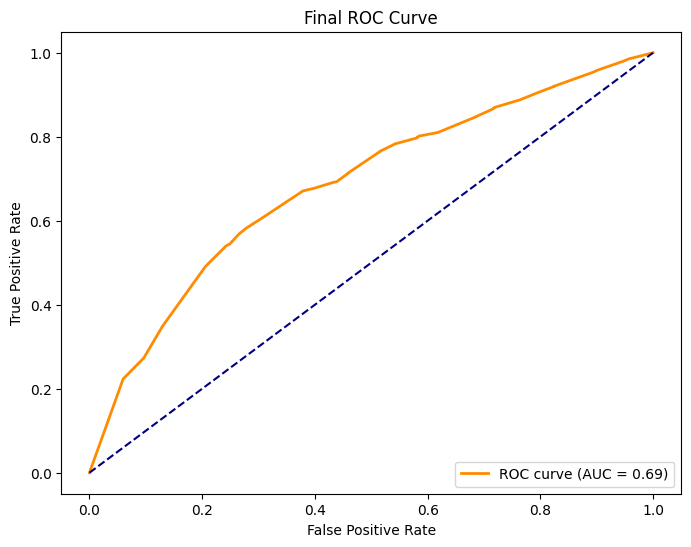

In [18]:
# 최적 파라미터 적용 후 모델 학습
optimal_params = {
    'max_depth': int(best['max_depth']),
    'learning_rate': best['learning_rate'],
    'n_estimators': int(best['n_estimators']),
    'subsample': best['subsample'],
    'colsample_bytree': best['colsample_bytree'],
    'scale_pos_weight': scale_pos_weight,
    'min_child_weight': best['min_child_weight'],
    'gamma': best['gamma'],
    'random_state': 42
}

final_model = XGBClassifier(**optimal_params)
final_model.fit(X_train, y_train)

# 최종 성능 평가
y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)[:, 1]  # ROC-AUC 계산을 위한 확률값

# F1 Score
final_f1 = f1_score(y_test, y_pred)
print(f"Final F1 Score: {final_f1:.4f}")

# 정확도
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Final Accuracy: {final_accuracy:.4f}")

# ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
final_roc_auc = auc(fpr, tpr)
print(f"Final ROC-AUC: {final_roc_auc:.4f}")

# ROC-AUC 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {final_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Final ROC Curve')
plt.legend(loc='lower right')
plt.show()


## <li> Logistic regression(둘 다 사용)

In [38]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# 데이터 로드 및 전처리
enteral_infusion_data = pd.read_csv("./data/enteral_data_final.csv")
X = enteral_infusion_data.drop(columns=['subject_id', 'hadm_id', 'admittime', 'dischtime', 'time_to_next_admission', 'readmission_within_30_days', 'icd_code', 'long_title'])
y = enteral_infusion_data['readmission_within_30_days']

# 문자열 데이터를 범주형으로 변환
object_cols = X.select_dtypes(include=['object']).columns
for col in object_cols:
    X[col] = X[col].astype('category')

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Objective 함수 정의
def objective(trial):
    # 하이퍼파라미터 제안
    C = trial.suggest_loguniform('C', 1e-4, 1e4)  # 규제 강도
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])  # 클래스 가중치

    # 로지스틱 회귀 모델 생성
    logistic_model = LogisticRegression(
        max_iter=1000,
        solver='liblinear',
        C=C,
        class_weight=class_weight
    )

    # 교차 검증 점수 계산 (F1 스코어 사용)
    f1 = cross_val_score(logistic_model, X_train, y_train, cv=3, scoring='f1').mean()

    return f1  # F1 스코어 최대화 목표

# Optuna 스터디 생성 및 최적화 실행
study = optuna.create_study(direction='maximize')  # 최대화 목표
study.optimize(objective, n_trials=50)  # 50번의 반복

# 최적의 하이퍼파라미터 출력
print(f"Best Parameters: {study.best_params}")
print(f"Best F1 Score: {study.best_value:.4f}")

# 최적의 하이퍼파라미터로 최종 모델 학습
best_params = study.best_params
final_model = LogisticRegression(
    max_iter=1000,
    solver='liblinear',
    C=best_params['C'],
    class_weight=best_params['class_weight']
)
final_model.fit(X_train, y_train)

# 테스트 데이터에서 평가
y_pred = final_model.predict(X_test)
y_pred_prob = final_model.predict_proba(X_test)[:, 1]  # 확률값

# 평가 결과 출력
accuracy = accuracy_score(y_test, y_pred)
roc_auc = auc(*roc_curve(y_test, y_pred_prob)[:2])
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")


[I 2024-12-11 23:28:05,394] A new study created in memory with name: no-name-36ea3daa-88c2-4d4a-9db1-8da0ab26bf9f
C:\Users\songa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-12-11 23:28:05,545] Trial 0 finished with value: 0.77307976161789 and parameters: {'C': 0.009265942906248352, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.77307976161789.
C:\Users\songa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-12-11 23:28:05,714] Trial 1 finished with value: 0.7724817701554997 and paramet

[I 2024-12-11 23:28:08,230] Trial 16 finished with value: 0.957835780523043 and parameters: {'C': 0.001680680868101483, 'class_weight': None}. Best is trial 3 with value: 0.957835780523043.
C:\Users\songa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-12-11 23:28:08,422] Trial 17 finished with value: 0.957835780523043 and parameters: {'C': 0.11218919120929179, 'class_weight': None}. Best is trial 3 with value: 0.957835780523043.
C:\Users\songa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-12-11 2

[I 2024-12-11 23:28:11,540] Trial 33 finished with value: 0.957835780523043 and parameters: {'C': 1792.0884020206893, 'class_weight': None}. Best is trial 3 with value: 0.957835780523043.
C:\Users\songa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-12-11 23:28:11,678] Trial 34 finished with value: 0.7747631977250155 and parameters: {'C': 0.03665022892193131, 'class_weight': 'balanced'}. Best is trial 3 with value: 0.957835780523043.
C:\Users\songa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-12

Best Parameters: {'C': 0.005229321700688681, 'class_weight': None}
Best F1 Score: 0.9578
Accuracy: 0.9288
ROC-AUC: 0.6721
F1 Score: 0.9631


## <li> Random Forest(둘 다 사용)

[I 2024-12-11 23:31:39,750] A new study created in memory with name: no-name-49623a42-7a36-4b90-96ef-fa9005c41bcd
[I 2024-12-11 23:31:44,522] Trial 0 finished with value: 0.9349820362875662 and parameters: {'n_estimators': 188, 'max_features': 0.22483038410536196, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9349820362875662.
[I 2024-12-11 23:31:50,185] Trial 1 finished with value: 0.9369246429345299 and parameters: {'n_estimators': 95, 'max_features': 0.6809574641366305, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.9369246429345299.
[I 2024-12-11 23:31:54,373] Trial 2 finished with value: 0.9453603856140941 and parameters: {'n_estimators': 60, 'max_features': 0.5964016927426246, 'class_weight': None}. Best is trial 2 with value: 0.9453603856140941.
[I 2024-12-11 23:32:01,260] Trial 3 finished with value: 0.9353506516440323 and parameters: {'n_estimators': 197, 'max_features': 0.2558379360274954, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.945

[I 2024-12-11 23:35:46,619] Trial 37 finished with value: 0.9350458112089326 and parameters: {'n_estimators': 189, 'max_features': 0.296346813401403, 'class_weight': 'balanced'}. Best is trial 33 with value: 0.9468907271072764.
[I 2024-12-11 23:35:53,046] Trial 38 finished with value: 0.9459386376484454 and parameters: {'n_estimators': 116, 'max_features': 0.6860937094062425, 'class_weight': None}. Best is trial 33 with value: 0.9468907271072764.
[I 2024-12-11 23:36:01,701] Trial 39 finished with value: 0.9466757475583317 and parameters: {'n_estimators': 191, 'max_features': 0.4207726682600458, 'class_weight': None}. Best is trial 33 with value: 0.9468907271072764.
[I 2024-12-11 23:36:03,710] Trial 40 finished with value: 0.9366738210421844 and parameters: {'n_estimators': 52, 'max_features': 0.4214312404514002, 'class_weight': 'balanced'}. Best is trial 33 with value: 0.9468907271072764.
[I 2024-12-11 23:36:10,188] Trial 41 finished with value: 0.9465002687017936 and parameters: {'n_e

Best Parameters: {'n_estimators': 193, 'max_features': 0.41856036501425914, 'class_weight': None}
Best F1 Score: 0.9469
Accuracy: 0.9073
ROC-AUC: 0.6183
F1 Score: 0.9511


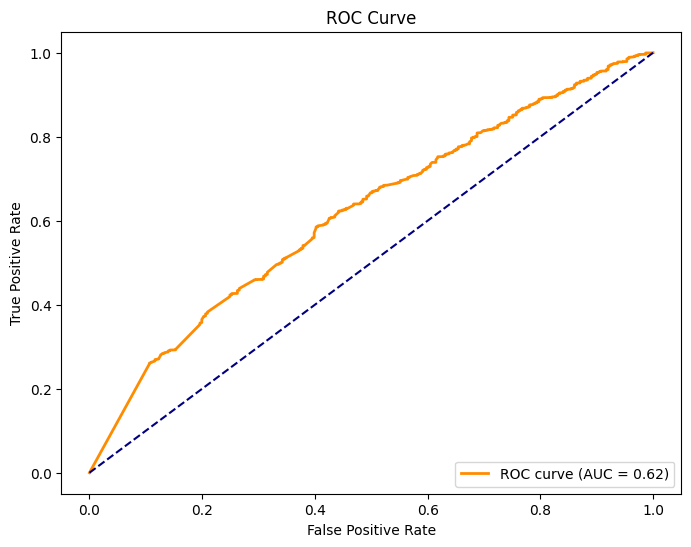

In [39]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score
import matplotlib.pyplot as plt
import optuna

# CSV 파일 읽기
enteral_infusion_data = pd.read_csv("./data/enteral_data_final.csv")

# 레이블 및 독립변수 설정
X = enteral_infusion_data.drop(columns=['subject_id', 'hadm_id', 'admittime', 'dischtime', 'time_to_next_admission', 'readmission_within_30_days', 'icd_code', 'long_title'])
y = enteral_infusion_data['readmission_within_30_days']

# 데이터 타입 확인 및 문자열 데이터 변환
object_cols = X.select_dtypes(include=['object']).columns
if len(object_cols) > 0:
    for col in object_cols:
        X[col] = X[col].astype('category')

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Objective 함수 정의
def objective(trial):
    # 하이퍼파라미터 제안
    n_estimators = trial.suggest_int('n_estimators', 50, 200)  # 트리 수
    max_features = trial.suggest_float('max_features', 0.1, 1.0)  # 각 트리의 최대 특성 비율
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])  # 클래스 가중치

    # 랜덤포레스트 모델 생성
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_features=max_features,
        class_weight=class_weight,
        random_state=42
    )

    # 교차 검증 점수 계산 (F1 스코어 사용)
    f1 = cross_val_score(rf, X_train, y_train, cv=3, scoring='f1').mean()

    return f1  # F1 스코어 최대화 목표

# Optuna 스터디 생성 및 최적화 실행
study = optuna.create_study(direction='maximize')  # 최대화 목표
study.optimize(objective, n_trials=50)  # 50번의 반복

# 최적의 하이퍼파라미터 출력
best_params = study.best_params
best_f1_score = study.best_value

print(f"Best Parameters: {best_params}")
print(f"Best F1 Score: {best_f1_score:.4f}")

# 최적의 하이퍼파라미터로 최종 모델 학습
final_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_features=best_params['max_features'],
    class_weight=best_params['class_weight'],
    random_state=42
)
final_model.fit(X_train, y_train)

# 테스트 데이터에서 평가
y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)[:, 1]  # 확률값

# 정확도
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"ROC-AUC: {roc_auc:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# ROC-AUC 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()